In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [25]:
df = pd.read_csv('../data/cleaned-premier-league-data.csv')
df

,date,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
0,08/08/2015,2,1,0,7.024,3.303,3.748,18,17,0,0
1,08/08/2015,6,22,1,6.697,4.338,8.967,1,8,0,0
2,08/08/2015,8,24,1,6.842,3.514,4.852,11,18,0,0
3,08/08/2015,12,21,2,7.000,3.207,3.742,14,16,0,0
4,08/08/2015,15,23,2,6.477,3.651,5.318,4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1241,12/05/2019,13,27,2,6.619,8.266,8.563,4,18,1,1
1242,12/05/2019,15,5,0,6.563,8.631,8.438,2,19,0,-1
1243,12/05/2019,19,10,1,6.204,7.470,6.521,17,16,-1,0
1244,12/05/2019,23,8,1,6.153,6.795,3.233,3,8,-1,1


In [26]:
df.shape


(1246, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1246 non-null   object 
 1   home_team         1246 non-null   int64  
 2   away_team         1246 non-null   int64  
 3   home_outcome      1246 non-null   int64  
 4   avg_odd_home_win  1246 non-null   float64
 5   avg_odd_draw      1246 non-null   float64
 6   avg_odd_away_win  1246 non-null   float64
 7   home_ranking      1246 non-null   int64  
 8   away_ranking      1246 non-null   int64  
 9   last_home_result  1246 non-null   int64  
 10  last_away_result  1246 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 107.2+ KB


In [28]:
df.describe()

,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,13.856340,13.745586,1.133226,7.274838,4.441469,3.684693,11.115570,10.457464,-0.089888,0.072231
std,8.224427,8.194932,0.851120,1.043937,1.647506,1.604586,5.543357,5.684987,0.851143,0.860326
min,0.000000,0.000000,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,-1.000000,-1.000000
25%,7.000000,7.000000,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,-1.000000,-1.000000
50%,14.000000,14.000000,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,0.000000,0.000000
75%,21.000000,21.000000,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,1.000000,1.000000
max,27.000000,27.000000,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,1.000000,1.000000


In [29]:
# Finding the mean of all columns
column_means = df.mean(numeric_only=True)
print(column_means)

home_team           13.856340
away_team           13.745586
home_outcome         1.133226
avg_odd_home_win     7.274838
avg_odd_draw         4.441469
avg_odd_away_win     3.684693
home_ranking        11.115570
away_ranking        10.457464
last_home_result    -0.089888
last_away_result     0.072231
dtype: float64


In [30]:
# Finding the median of all columns
column_medians = df.median(numeric_only=True)
print(column_medians)

home_team           14.000
away_team           14.000
home_outcome         1.000
avg_odd_home_win     7.056
avg_odd_draw         3.535
avg_odd_away_win     3.197
home_ranking        11.000
away_ranking        10.000
last_home_result     0.000
last_away_result     0.000
dtype: float64


In [31]:
# Calculate the mode (most frequent value) for each column and select the first mode in case of multiple
single_mode = df.mode().iloc[0]
print(single_mode)

date                12/05/2019
home_team                  8.0
away_team                  8.0
home_outcome               2.0
avg_odd_home_win         6.515
avg_odd_draw             3.172
avg_odd_away_win         2.085
home_ranking              11.0
away_ranking               6.0
last_home_result          -1.0
last_away_result           1.0
Name: 0, dtype: object


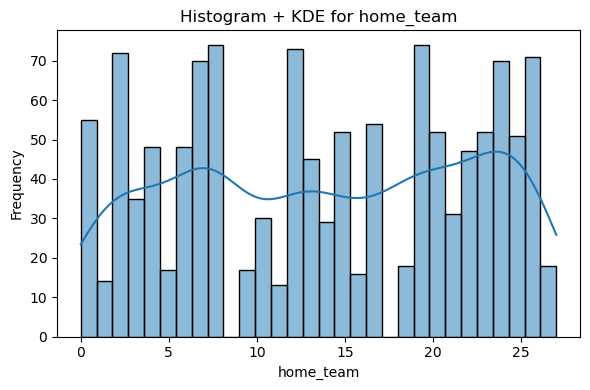

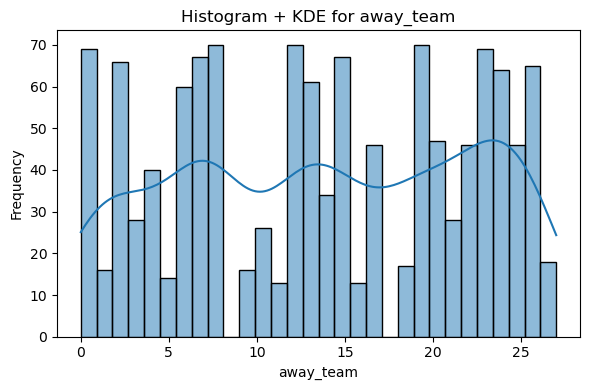

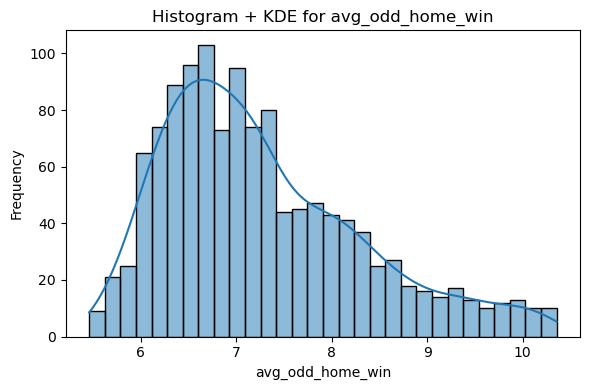

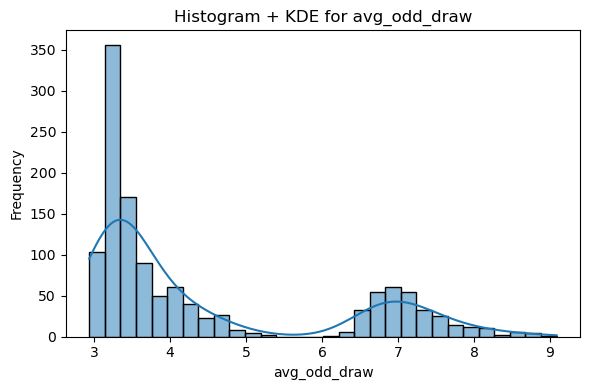

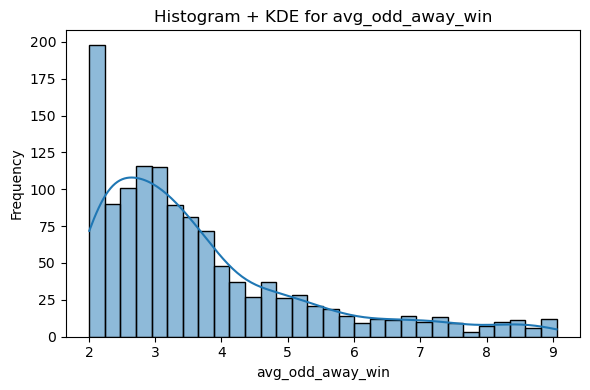

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'home_team', 'away_team',
    'avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win',
]

# Create histogram with KDE for each selected column
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram + KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [33]:
df['home_ranking'].value_counts().sort_index()

home_ranking
1     50
2     48
3     45
4     39
5     55
6     61
7     69
8     64
9     71
10    62
11    74
12    70
13    69
14    70
15    66
16    69
17    63
18    62
19    74
20    65
Name: count, dtype: int64

In [34]:
df['away_ranking'].value_counts().sort_index()

away_ranking
1     57
2     63
3     58
4     56
5     68
6     73
7     63
8     67
9     63
10    58
11    67
12    65
13    61
14    66
15    62
16    58
17    61
18    62
19    58
20    60
Name: count, dtype: int64

looks like they have been an error with team ranking 18-19 that might have been combined into 20 which would explain why it is so much larger then the others

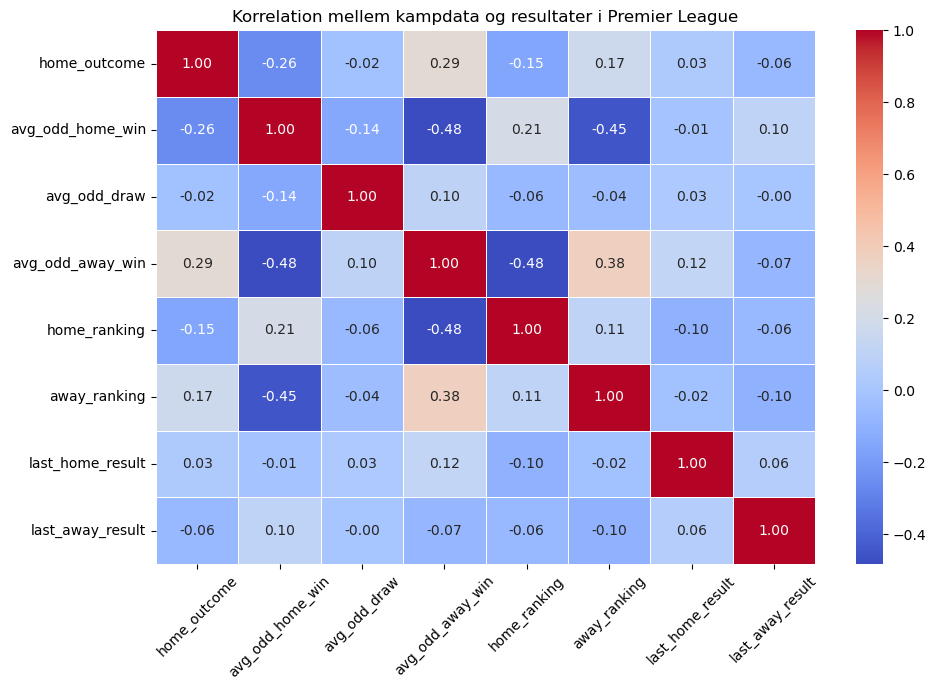

In [35]:
# drop columns that are not needed for correlation analysis
only_numerical_df = df.drop (columns=['date', 'home_team', 'away_team']) 

corr = only_numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelation mellem kampdata og resultater i Premier League')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- `home_outcome` has a clear negative correlation with `avg_odd_home_win` and a positive correlation with `avg_odd_away_win` – in other words:  
  **The lower the odds for the home team, the more likely they are to win.**

- `home_ranking` and `away_ranking` also correlate with `home_outcome`, suggesting that **ranking has an impact on the result**.

- `last_home_result` and `last_away_result` show a **weak correlation** with the outcome, indicating that **previous match results may have a small effect**.


In [36]:
# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')

# Fit PCA on numeric data
pca = PCA()
pca_data = pca.fit_transform(numeric_df)

pca_data

array([[ -0.03229146, -16.24518091,  11.19644132, ...,   0.58394118,
         -0.13210724,  -1.04412092],
       [-11.69449764,  -0.14142926,  -8.07635542, ...,   1.18960269,
         -0.86029227,  -0.36207331],
       [-11.46134475,   4.20408707,   5.50876614, ...,   0.29319226,
         -0.03167172,  -0.15527702],
       ...,
       [  6.24691176,   1.47035808,   7.89715115, ...,   0.5706366 ,
         -1.32794305,  -0.25211834],
       [ 10.43686987,   1.14942336,  -6.98171244, ...,  -1.05330539,
         -0.96127981,  -0.54049   ],
       [ -0.85331406,  16.09469498,   2.02671701, ...,  -0.63973906,
         -1.16975776,  -1.14730229]])

In [37]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.34196842, 0.31358791, 0.16822589, 0.14257652, 0.01305211,
       0.00740593, 0.00383468, 0.00328691, 0.00321336, 0.00284828])

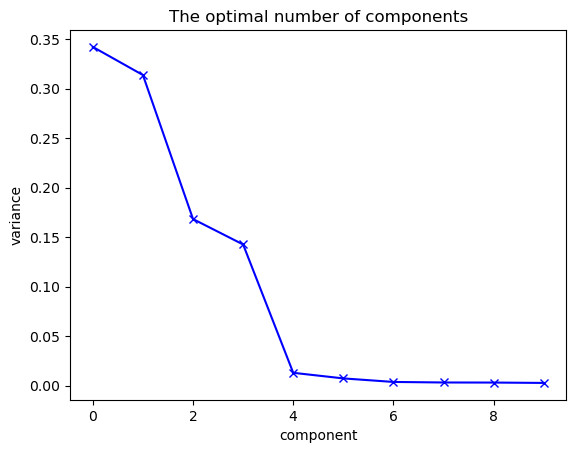

In [38]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

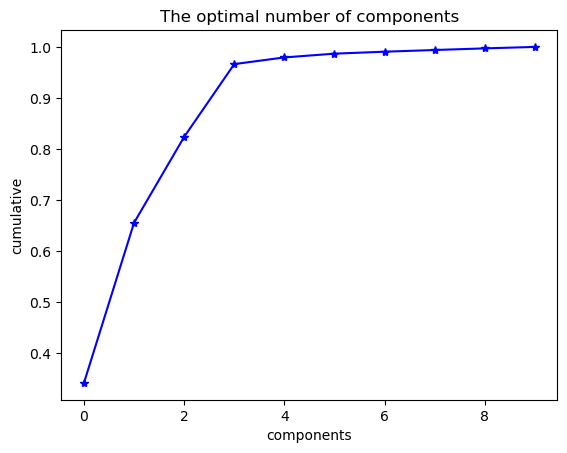

In [39]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

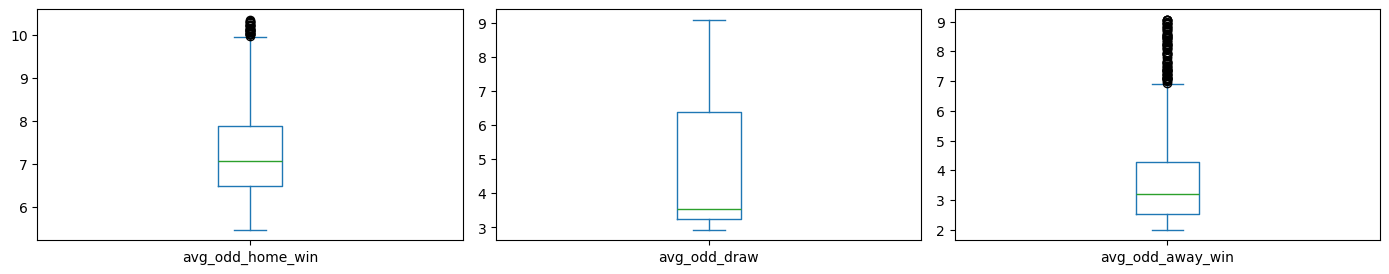

In [51]:
# Udvælg de ønskede kolonner
columns_to_plot = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win'
]

# Lav boxplots med subplots
df[columns_to_plot].plot(
    kind='box',
    subplots=True,
    layout=(3, 3),  # 3x3 grid for at få god plads
    sharex=False,
    sharey=False,
    figsize=(14, 8),
    whis=1.5
)

plt.tight_layout()
plt.show()
